# Data Visualization with Seaborn

데이터의 통계적 수치, 해석도 중요하지만 시각화를 통해 outlier, 분포 등을 쉽게 확인 할 수 있음.

## Library

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Linear Regression Plot : Anscombe 

In [7]:
sns.set(style = 'ticks')

df = sns.load_dataset('anscombe')
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [8]:
df.shape

(44, 3)

In [9]:
df.groupby(['dataset']).describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

평균과 표준편차는 같지만 최소, 최대값의 차이가 있다.

* Correlation

In [10]:
dataset = df['dataset'].unique()

for i in dataset:
    corr = df[df['dataset'] == i].corr()
    print(i,":")
    print(corr)
    print()

I :
          x         y
x  1.000000  0.816421
y  0.816421  1.000000

II :
          x         y
x  1.000000  0.816237
y  0.816237  1.000000

III :
          x         y
x  1.000000  0.816287
y  0.816287  1.000000

IV :
          x         y
x  1.000000  0.816521
y  0.816521  1.000000



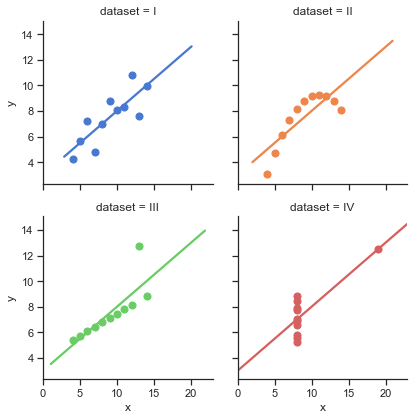

In [11]:
sns.lmplot(x = 'x', y = 'y', data = df, hue = "dataset",
           col = 'dataset', col_wrap = 2, ci = None, palette = 'muted',
          height = 3, scatter_kws = {"s": 50, "alpha" : 1})

lineplot은 x,y 모두 수치형 데이터일 때 사용한다.

hue 옵션을 통해 해당 열의 색깔별로 볼 수 있다.

col_wrap = 2 옵션을 통해 2개의 열로 나눠 그림을 볼 수 있다.

alpha는 투명도를 의미한다. s가 증가할수록 포인트가 더욱 커진다.

## Barplot :Color Palette Choices

In [12]:
sns.set(style = 'white', context = 'talk')

In [13]:
rs = np.random.RandomState(8)
rs

항상 같은 값이 나오게 RandomState를 설정함

In [14]:
x = np.array(list("ABCDEFGHIJ"))
print(x)

y1 = np.arange(1,11)
print(y1)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
[ 1  2  3  4  5  6  7  8  9 10]


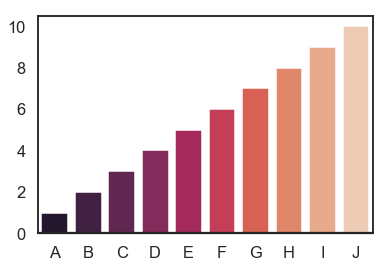

In [15]:
sns.barplot(x = x, y = y1, palette = "rocket"
           ).axhline(0, color = 'k', clip_on = False)

palette = 'rocket'은 각 bar를 진한 색에서 점차 연한 색으로 지정해준다.

axhline(0, color = 'k')는 X축의 0점에 검은 선을 추가하는 옵션이다.

In [16]:
y2 = y1 - 5.5
y2

array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5])

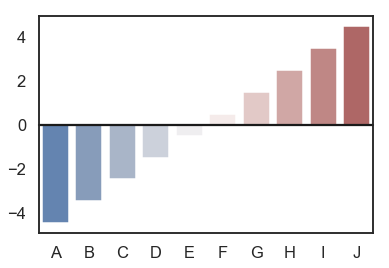

In [17]:
sns.barplot(x = x, y = y2, palette = "vlag"
           ).axhline(0, color = 'k', clip_on = False)

palette = 'vlag'는 음수는 파란색, 양수로 갈수록 붉은 색으로 바꿔준다.

axhline(0, color = 'k')를 통해 0값에 검은 선을 그려줌

In [18]:
y3 = rs.choice(y1, len(y1), replace = False)
y3

array([ 9,  7, 10,  1,  3,  6,  8,  2,  5,  4])

y1의 길이만큼 y1을 랜덤하게 선택한다.

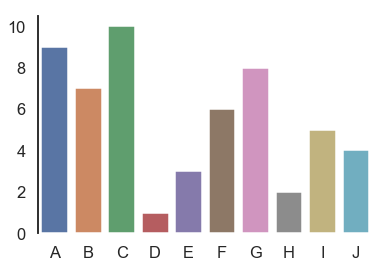

In [19]:
sns.barplot(x = x, y = y3, palette = "deep")
sns.despine(bottom = True)

sns.despine 옵션을 통해 프레임을 삭제함

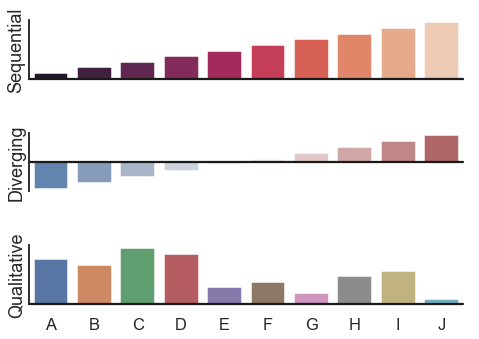

In [20]:
# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

## Multiple LInear Regression

In [21]:
sns.set()

In [22]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

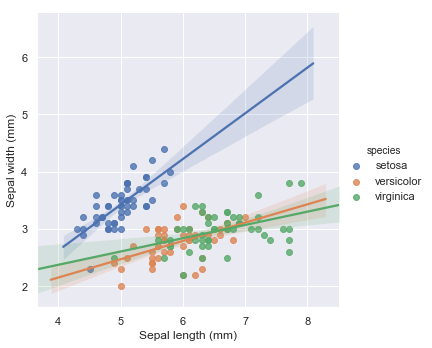

In [25]:
g = sns.lmplot(x = 'sepal_length', y = 'sepal_width',
           hue = 'species', height = 5, data = iris)
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

col 옵션을 통해 Species별 서브플롯을 그렸음.

g로 저장하면 plot을 문구 없이 깨끗하게 볼 수 있다.

## Cat Plot

In [26]:
sns.set(style = 'whitegrid')

In [27]:
titanic = sns.load_dataset('titanic')

In [28]:
titanic.shape

(891, 15)

In [29]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


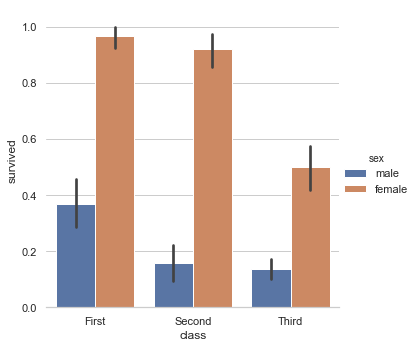

In [30]:
sns.catplot(x = 'class', y = 'survived', 
            data = titanic, hue = 'sex', kind = 'bar')
sns.despine(left = True)

검은 선은 ci (confidence of interval)을 의미한다.

## Horizontal Bar Plots : Car crashes

In [31]:
sns.set(style="whitegrid")

In [32]:
crashes = sns.load_dataset('car_crashes')

crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [33]:
crashes = crashes.sort_values('total', ascending=False)
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY


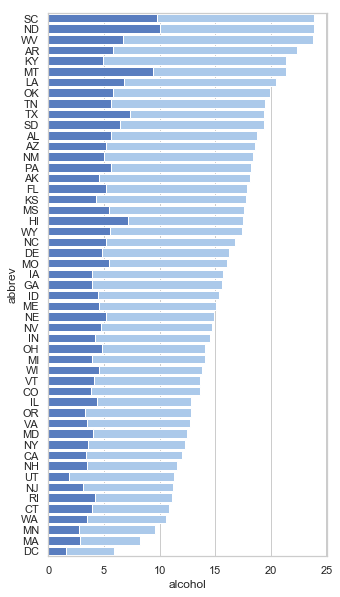

In [34]:
plt.figure(figsize = (5,10))
sns.set_color_codes('pastel')
sns.barplot(x = 'total', y = 'abbrev', data = crashes, color = 'b')

sns.set_color_codes('muted')
sns.barplot(x = 'alcohol', y = 'abbrev', data = crashes, color = 'b')

위 그래프는 전체 중 음주운전으로 인해 발생한 사건을 나타낸 그래프다.

sns.set_color_codes("pastel")은 색상을 파스텔톤으로 바꿔주고, 'muted'는 진한 색상으로 바꿔줌.

sns.legend에서 ncol = 1이면 1열로 정돈되고, ncol = 2이면 2열로 정돈된다.
frameon은 legend의 box frame을 말함.

## Boxplot : tips

In [35]:
tips = sns.load_dataset('tips')

In [36]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


Boxplot은 x축에 카테고리, y축에 수치형 데이터를 넣음

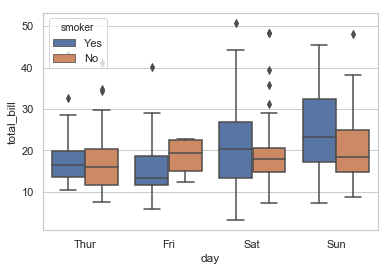

In [38]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips, 
            hue = 'smoker')

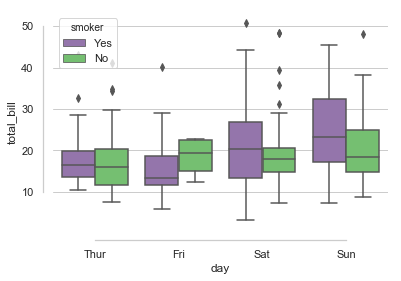

In [39]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

palette 옵션을 통해 다른 색을 입혀줌. offset으로 y축을 10부터 시작하고, trim = True로 테두리를 없앰

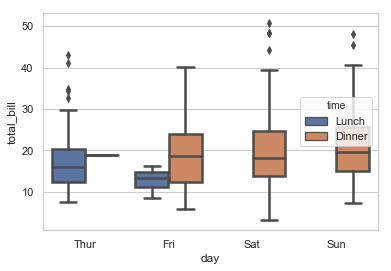

In [40]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips, linewidth=2.5)

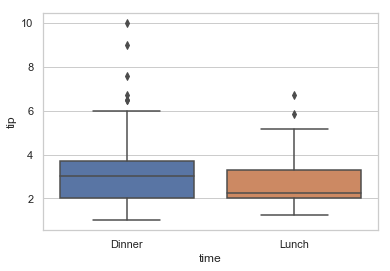

In [41]:
sns.boxplot(x="time", y="tip", data=tips, order=["Dinner", "Lunch"])

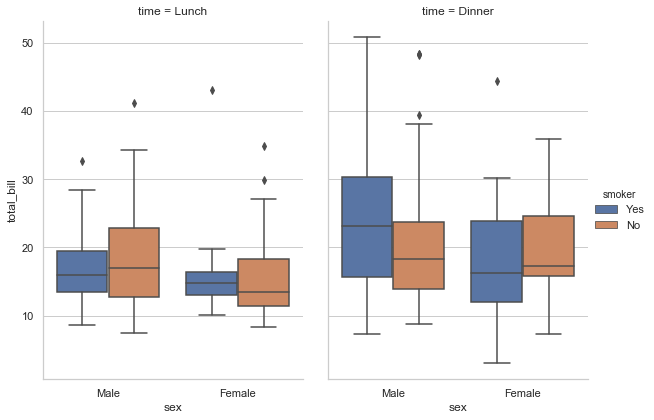

In [42]:
sns.catplot(x = 'sex', y = 'total_bill', data = tips,
           hue = 'smoker', col = 'time',
           kind = 'box', height = 6, aspect = .7)

aspect : scalar, optional
    Aspect ratio of each facet, so that ``aspect * height`` gives the width
    of each facet in inches. 

## Annotate

In [43]:
# import matplotlib.pyplot as plt

In [44]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [45]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [46]:
mpg['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [47]:
mpg_origin = mpg['origin'].value_counts()
mpg_origin

usa       249
japan      79
europe     70
Name: origin, dtype: int64

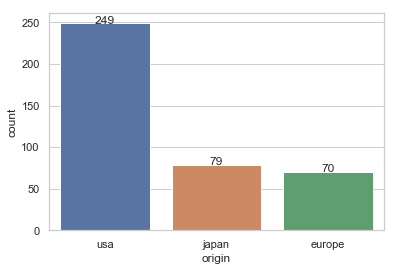

In [48]:
g = sns.countplot(x = 'origin', data = mpg)

for i in range(mpg_origin.shape[0]):
    g.text(x = i, y = mpg_origin[i], s = mpg_origin[i],
          horizontalalignment = 'center')

horizontalalignment = 'ceter'를 통해 글자를 가운데 정렬함

## Vilon Plot : tips

In [49]:
sns.set(style = 'whitegrid', palette = 'pastel', color_codes = True)

In [50]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [51]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


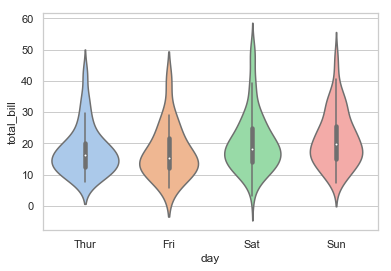

In [52]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips)

violin plot은 box plot과 달리 분포까지 함께 볼 수 있는 장점이 있다.

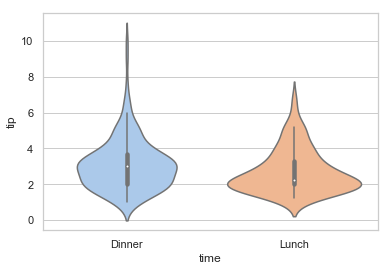

In [53]:
# order 옵션

sns.violinplot(x = 'time', y = 'tip', data = tips, order = ['Dinner', 'Lunch'])

order 옵션을 통해 순서를 지정함.

In [54]:
tips['weekend'] = tips['day'].isin(['Sat', 'Sun'])

tips.sample()

,total_bill,tip,sex,smoker,day,time,size,weekend
115,17.31,3.5,Female,No,Sun,Dinner,2,True


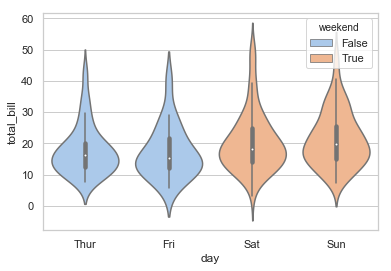

In [55]:
sns.violinplot(x = 'day', y = 'total_bill',
               data = tips, hue = 'weekend', dodge = False)

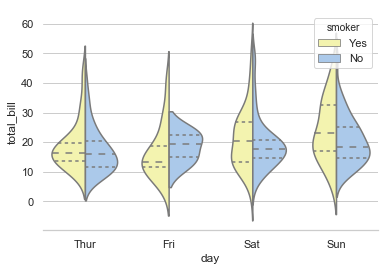

In [56]:
sns.violinplot(x = 'day', y = 'total_bill', hue = 'smoker',
              split = True, inner = 'quart',
              palette = {'Yes' : 'y', 'No' : 'b'},
              data = tips)
sns.despine(left = True)

x축엔 카테고리 데이터와 y축엔 수치형 데이터.

hue 옵션을 통해 smoker에 따라 색을 구분함.

split = True를 통해 반으로 나눔.

inner = 'quart' 옵션을 통해 분포 내에 4분위수를 표시함.

## Swarm Plot : iris

카테고리 데이터와 수치형 데이터를 표현

카테고리 데이터를 scatter plot 형태로 그리고 싶을 때 사용한다.

In [57]:
iris = sns.load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
8,4.4,2.9,1.4,0.2,setosa


In [58]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [59]:
iris = pd.melt(iris, 'species', var_name = 'measurement')
iris.head()

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


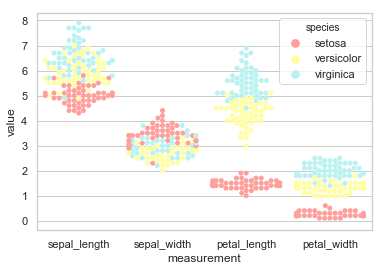

In [60]:
sns.swarmplot(x = 'measurement', y = 'value', hue = 'species',
              palette = ['r','y','c'], data = iris)

## Line Plot : fmri

LIne plot은 뇌파 측정, 초당 심장 박동수, 트래픽량, 거래량 등 시계열 데이터에 많이 쓰임. 

In [61]:
sns.set(style = 'darkgrid')

In [62]:
fmri = sns.load_dataset('fmri')

fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [63]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
subject      1064 non-null object
timepoint    1064 non-null int64
event        1064 non-null object
region       1064 non-null object
signal       1064 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.6+ KB


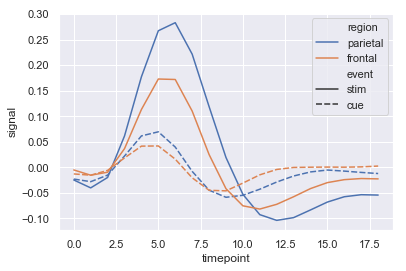

In [64]:
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'region', 
             style = 'event', ci = None, data = fmri)

style은 다른 대쉬와 마커로 표현하는 옵션이다.

## Lineplot from a wide-form dataset

In [65]:
rs = np.random.RandomState(365)
rs

In [66]:
values = rs.randn(365,4).cumsum(axis = 0)
pd.DataFrame(values).head()

,0,1,2,3
0,0.167921,0.523505,0.817376,1.703846
1,-1.979026,1.237704,0.057230,2.743267
2,-2.945478,1.094025,1.628355,2.359988
3,-2.307479,0.749367,1.624072,2.518347
4,-3.270573,0.333310,1.867085,2.866550


In [67]:
dates = pd.date_range("1 1 2016", periods = 365, freq = "D")
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [68]:
data = pd.DataFrame(values, dates, columns = ['A', 'B','C','D'])
data.head(1)

,A,B,C,D
2016-01-01,0.167921,0.523505,0.817376,1.703846


In [69]:
data.tail(1)

,A,B,C,D
2016-12-30,-20.767716,11.011414,-7.941476,19.358112


In [70]:
# 7일 간의 이동평균 (MA) 값을 구함

data = data.rolling(7).mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


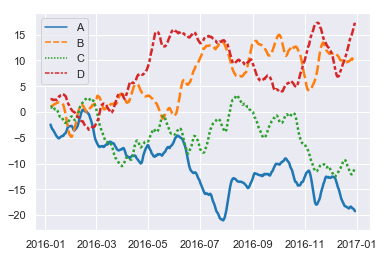

In [71]:
sns.lineplot(data = data, palette = 'tab10', linewidth = 2.5)

## Scatterplot : diamonds

x와 y 모두 수치형 데이터일 때 사용

In [72]:
diamonds = sns.load_dataset('diamonds')

In [73]:
diamonds.shape

(53940, 10)

In [74]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


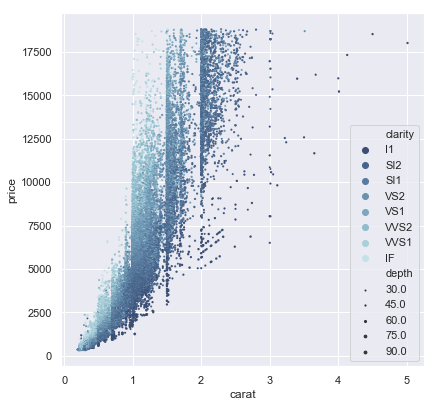

In [75]:
plt.figure(figsize = (6.5,6.5))
clarity_ranking = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'] # clarity ranking

sns.scatterplot(x = 'carat', y = 'price', hue = 'clarity', 
                hue_order = clarity_ranking, # ranking별로 표현
                size = 'depth',              # depth에 따라 point의 사이즈가 다름.
                palette = 'ch: r= -.2, d = .3_r',
                sizes = (1,8), linewidth = 0,
                data = diamonds)

## Boxenplot

In [76]:
sns.set(style = 'whitegrid')

In [77]:
sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [78]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


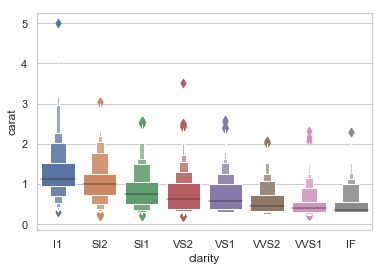

In [79]:
sns.boxenplot(data = diamonds, x = 'clarity', y = 'carat', 
              order = clarity_ranking)

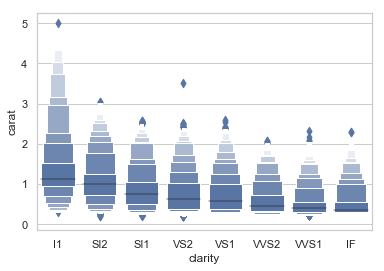

In [80]:
sns.boxenplot(data = diamonds, x = 'clarity', y = 'carat', 
              order = clarity_ranking, scale = 'linear', color = 'b')

boxplot은 수염 구간의 분포를 알 수 없다. 하지만 boxenplot은 수염 구간의 분포를 볼 수 있다.

## Scatterplot: planets

In [81]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [82]:
planets.shape

(1035, 6)

In [83]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [84]:
planets['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [85]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


orbital_period, distance를 보면 이상치가 많다는 것을 추측할 수 있다.

In [86]:
zoom = planets[(planets['distance'] < 200) & (planets['orbital_period'] < 7500)]
zoom.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


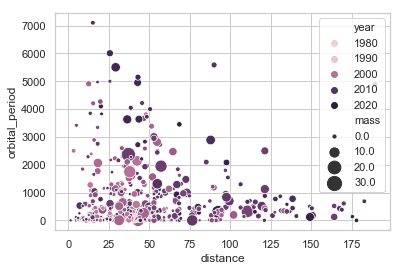

In [87]:
sns.scatterplot(data = zoom, x = 'distance', y = 'orbital_period',
               hue = 'year', size = 'mass', sizes = (10,200))

size 옵션을 추가해서 그래프가 확대되었다. -> distance가 8000인 값이 mass가 NaN이었음

scatter plot이나 lmplot은 수치형 데이터의 상관관계를 볼 때도 사용된다.

하지만 주로 데이터의 분포와 이상치를 파악하기 위해 사용한다.

In [88]:
planets[['distance', 'orbital_period']].corr()

,distance,orbital_period
distance,1.000000,-0.034365
orbital_period,-0.034365,1.000000


## Joint Plot

In [89]:
tips = sns.load_dataset('tips')
print(tips.shape)

tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


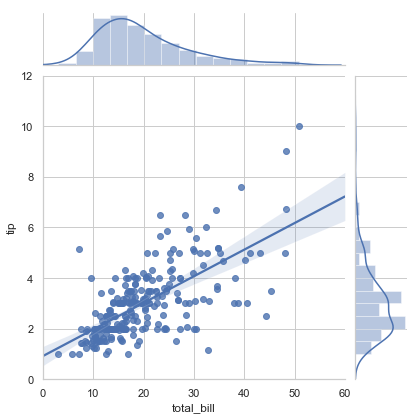

In [90]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg', xlim =(0,60), ylim = (0,12))
#sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'kde', xlim =(0,60), ylim = (0,12))
#sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'hex', xlim =(0,60), ylim = (0,12)) 

## Facetgrid

In [91]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [92]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [93]:
bins = np.linspace(0,60,13)

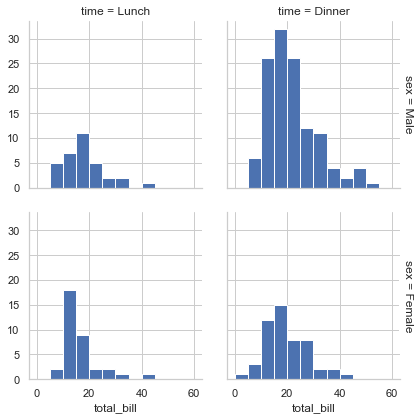

In [94]:
g = sns.FacetGrid(data = tips, row = 'sex', col = 'time', margin_titles = True)
g.map(plt.hist, 'total_bill', bins = bins)

margin_titles 옵션을 통해 time, sex를 각 테두리에 표시함.

bins 옵션을 통해 구간화 함.

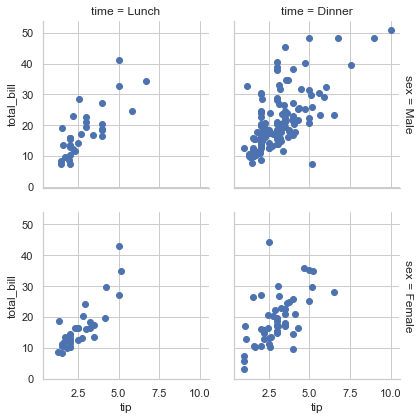

In [95]:
g = sns.FacetGrid(data = tips, row = 'sex', col = 'time', margin_titles = True)
g.map(plt.scatter, 'tip','total_bill')

scatter에는 bins 옵션이 존재하지 않음

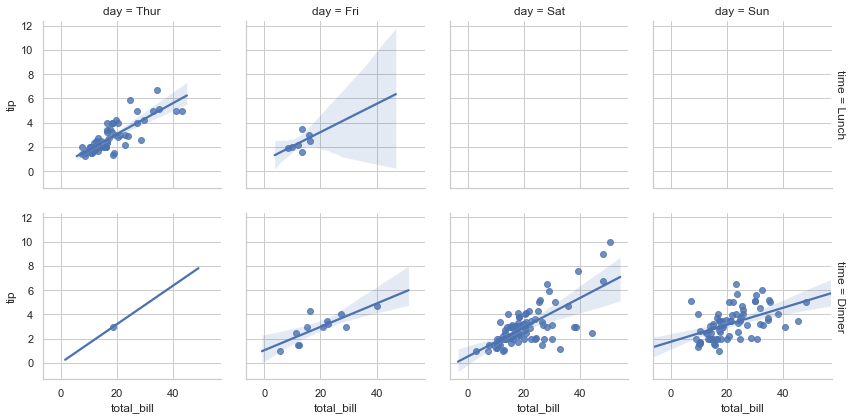

In [96]:
g = sns.FacetGrid(tips, row = 'time', col = 'day', margin_titles=True)
g.map(sns.regplot, 'total_bill', 'tip')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


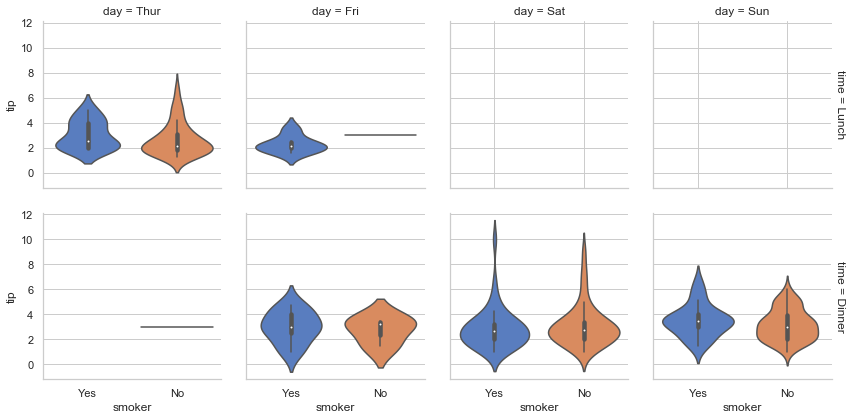

In [97]:
g = sns.FacetGrid(tips, row = 'time', col = 'day', margin_titles=True)
g.map(sns.violinplot, 'smoker', 'tip', palette = 'muted')

주말 점심에는 식사를 안 하는걸로 보인다.

In [98]:
tips.pivot_table(index = 'time', columns = 'day', 
                 values = 'total_bill', aggfunc = 'count')

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,61.0,7.0,NaN,NaN
Dinner,1.0,12.0,87.0,76.0


In [99]:
c = pd.crosstab(tips['time'], tips['day'])
c

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,61,7,0,0
Dinner,1,12,87,76


In [100]:
# Normalize 옵션을 통해 비율로 나타냄

n = pd.crosstab(tips['time'], tips['day'], normalize=True)
n

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,0.250000,0.028689,0.000000,0.000000
Dinner,0.004098,0.049180,0.356557,0.311475


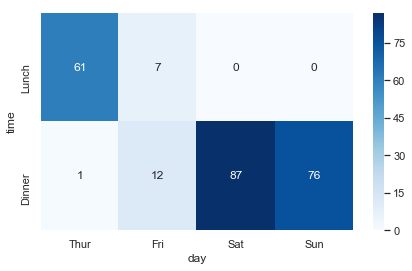

In [101]:
plt.figure(figsize = (7,4))
sns.heatmap(c, annot = True, cmap = 'Blues')

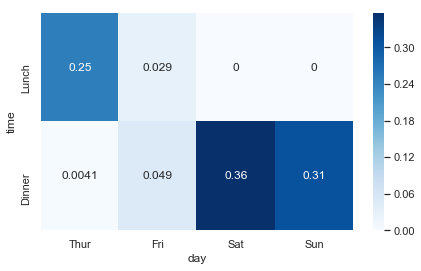

In [102]:
plt.figure(figsize = (7,4))
sns.heatmap(n, annot = True, cmap = 'Blues')

## Heatmap

In [103]:
flight_long = sns.load_dataset('flights')
flight_long.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [104]:
flights = flight_long.pivot(index = 'month', columns = 'year', values = 'passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


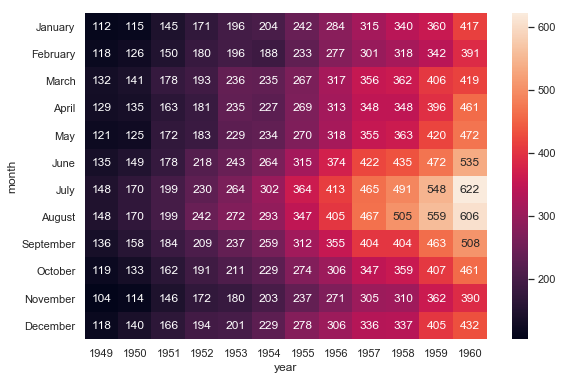

In [105]:
plt.figure(figsize = (9,6))
sns.heatmap(flights, annot = True, fmt = "d")

### Diagonal Correlation Matrix

In [106]:
from string import ascii_letters

In [107]:
rs = np.random.RandomState(33)
d = pd.DataFrame(data = rs.normal(size = (100,26)), # 정규분포를 이루는 100 x 26 행렬
                columns = list(ascii_letters[26:]))
d.head()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,...,-0.951219,0.832973,-1.000208,0.343463,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497
1,-1.230374,0.205848,0.821371,-0.493780,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,...,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,-1.094711,-1.654707
2,-0.023842,-0.363738,-0.482943,0.739577,0.611252,0.491802,1.792924,-0.683737,1.054113,-0.615562,...,-1.120717,0.991136,1.630796,-1.900090,0.062316,0.479998,0.379609,-1.512245,0.289020,0.095524
3,-0.292821,0.856582,0.933473,-0.421045,1.590430,-1.063801,2.104884,-1.090494,1.484521,-1.089229,...,0.230258,0.195235,0.535839,0.684299,2.821279,0.916504,0.150722,0.017747,0.006885,0.329035
4,-0.587376,1.751572,0.308274,-0.894283,-0.769156,0.869197,0.371381,-0.628362,-0.922477,-0.903391,...,1.519031,0.749896,-2.269087,-0.760599,-0.955502,0.923951,0.315157,1.340910,0.678992,0.594258


In [108]:
corr = d.corr()
corr.head()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,1.000000,-0.107401,-0.086468,0.000131,0.035047,0.004749,0.028226,0.000422,0.132100,0.057720,...,0.073645,-0.055396,-0.058241,-0.123823,0.096451,-0.015178,0.172725,0.003791,0.005531,-0.011534
B,-0.107401,1.000000,0.254632,0.061506,0.043581,-0.078019,0.069133,-0.211278,-0.011796,0.085277,...,0.031315,0.100451,-0.103068,0.011187,-0.008536,-0.030730,-0.022978,-0.050483,-0.014468,0.078737
C,-0.086468,0.254632,1.000000,-0.033682,-0.127464,0.141223,0.164793,-0.188574,-0.230059,0.145777,...,0.010497,0.051872,0.084793,0.167976,-0.043806,-0.057125,0.125580,-0.068426,-0.052764,0.094661
D,0.000131,0.061506,-0.033682,1.000000,0.086054,-0.153212,-0.000963,-0.017282,-0.109283,0.011056,...,-0.136959,-0.061816,0.134112,0.081143,0.124706,0.194911,-0.016944,-0.116963,0.054315,0.014383
E,0.035047,0.043581,-0.127464,0.086054,1.000000,-0.007159,0.157224,-0.096254,0.043785,0.015117,...,0.090499,0.041276,0.076138,0.027021,0.069976,-0.021745,0.104822,-0.047913,0.120465,0.080980


In [109]:
# Generate a mask for the upper triangle

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
mask[:, 2]

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [110]:
cmap = sns.diverging_palette(220,10,as_cmap = True)

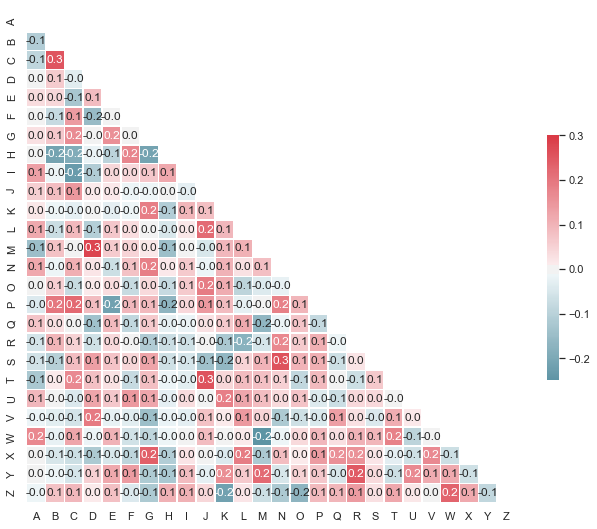

In [111]:
plt.figure(figsize = (11,9))
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, vmax = .3,
            annot=True, fmt = '0.1f',
           square = True, linewidths = .5, cbar_kws = {'shrink' : .5})

center = 0 옵션으로 색상의 기준을 0으로 한다.

cbar_kws = {"shrink" : .5}를 통해 범례의 크기를 줄여줌.

## Pairplot

In [112]:
df = sns.load_dataset('iris')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


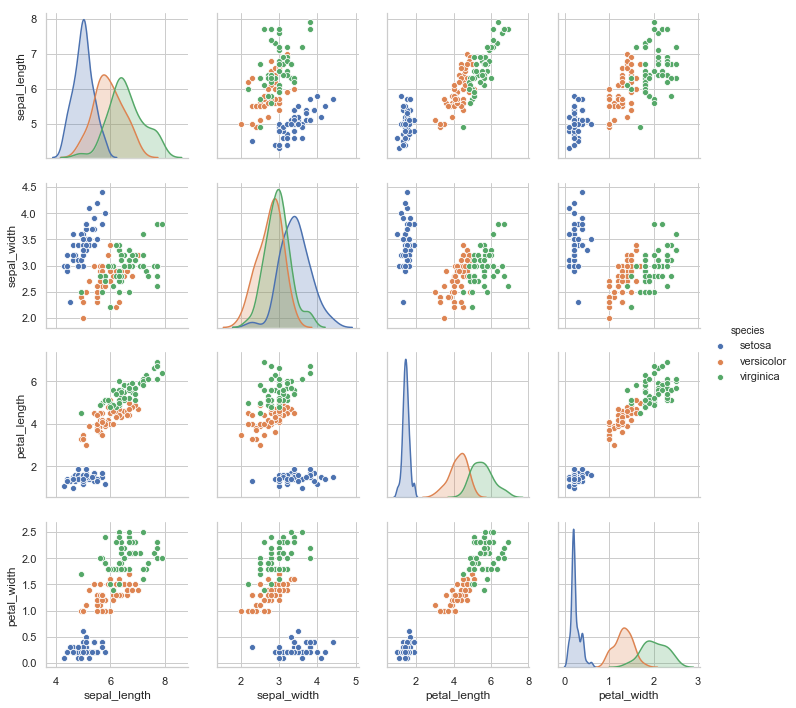

In [113]:
sns.pairplot(df, hue = 'species')

## KDE plot

In [114]:
iris = sns.load_dataset('iris')

In [115]:
setosa = iris.query("species == 'setosa'")
print(setosa.shape)

virginica = iris.query("species == 'virginica'")
print(setosa.shape)

(50, 5)
(50, 5)


In [116]:
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


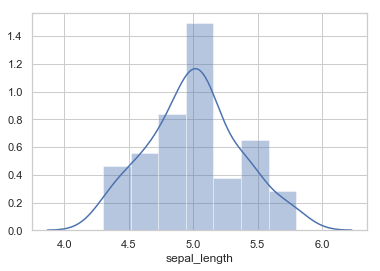

In [117]:
# distplot은 x, y를 넣지않음.

sns.distplot(setosa['sepal_length'])

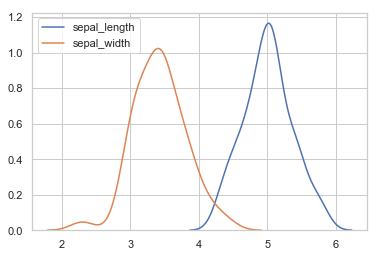

In [118]:
sns.kdeplot(setosa['sepal_length'])
sns.kdeplot(setosa['sepal_width'])

Text(3.8, 4.5, 'setosa')

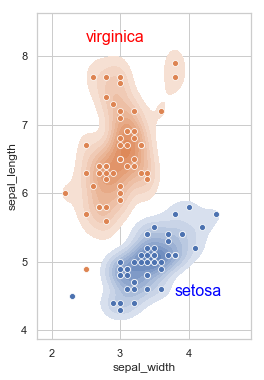

In [119]:
figure, ax = plt.subplots(figsize = (6,6))

ax.set_aspect('equal') 

ax = sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], 
            shade = True, shade_lowest = False,)
sns.scatterplot(data = setosa, x = 'sepal_width', y = 'sepal_length')
ax = sns.kdeplot(virginica['sepal_width'], virginica['sepal_length'], 
            shade = True, shade_lowest = False)
sns.scatterplot(data = virginica, x = 'sepal_width', y = 'sepal_length')

ax.text(2.5, 8.2, 'virginica', size = 16, color = 'red')
ax.text(3.8,4.5, 'setosa', size = 16, color = 'blue')

shade = True를 하게 되면 밀도에 따라 색을 다르게 할 수 있음.

shade_lowest = False를 하면 배경색을 없앨 수 있음.

# PairGrid

In [127]:
df = sns.load_dataset('iris')

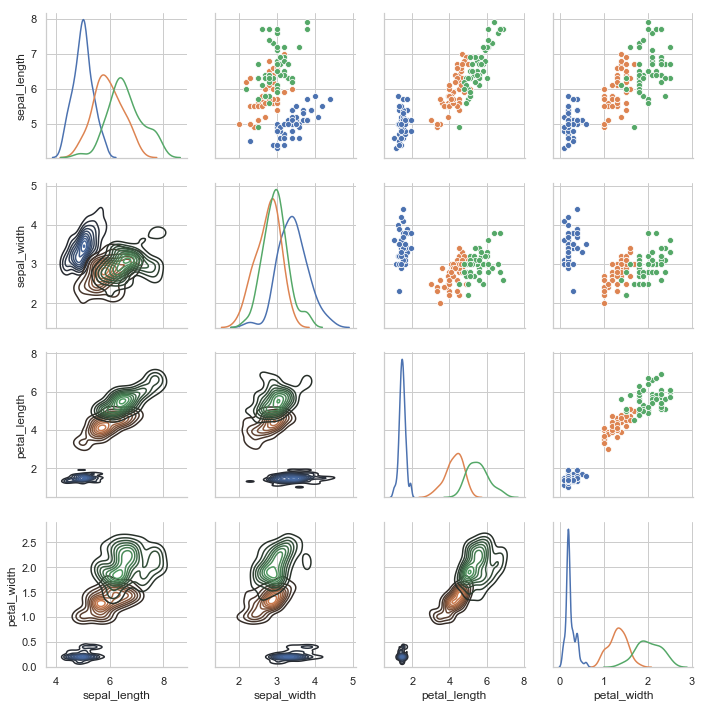

In [131]:
g = sns.PairGrid(df,  diag_sharey= False, hue = 'species')
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)

pairplot은 두 개의 그래프가 겹치지만 PairGrid는 두 종류의 그래프를 쉽게 볼 수 있다.

## 시계열 데이터 시각화하기 : flight datasets
#### 가설 : 여름 휴가철에는 항공 이용이 많을 것이다.
    
 #### 분석을 통해 얻을 수 있는 것?


* 추세를 파악 할 수 있음. 

수요가 늘고 있다면 늘어나는 수요에 대비

수요가 줄어들고 있다면 서비스 개선, 새로운 사업 계획을 세움

* 계절에 따라 수요에 대한 계획을 세울 수 있다.

재고량, 예산, 운영인력, 시스템을 구성하는 트래픽 양 등

In [143]:
# 라이브러리 로드
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [136]:
df = sns.load_dataset('flights')

print(df.shape)
df.head()

(144, 3)


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


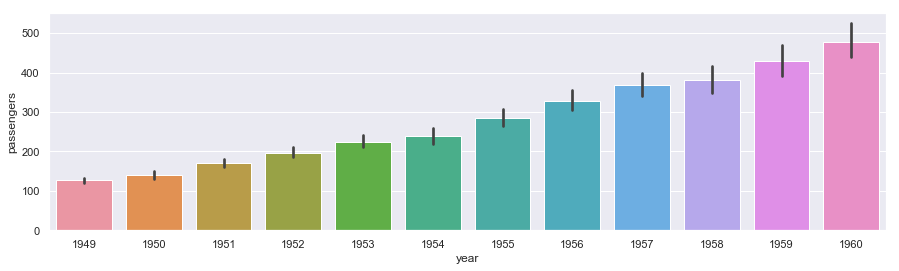

In [145]:
# barplot

plt.figure(figsize = (15,4))
sns.barplot(data = df, x = 'year', y = 'passengers')

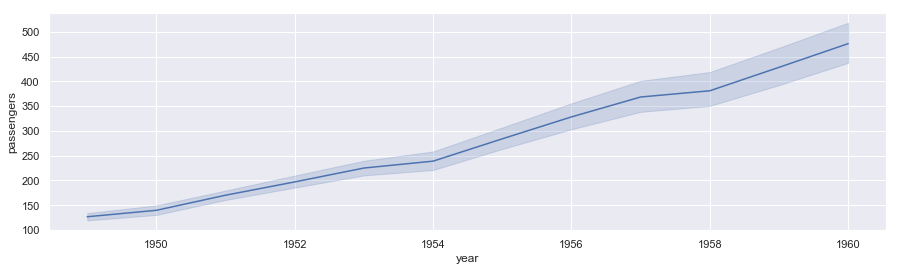

In [146]:
# lineplot

plt.figure(figsize = (15,4))
sns.lineplot(data = df, x = 'year', y = 'passengers')

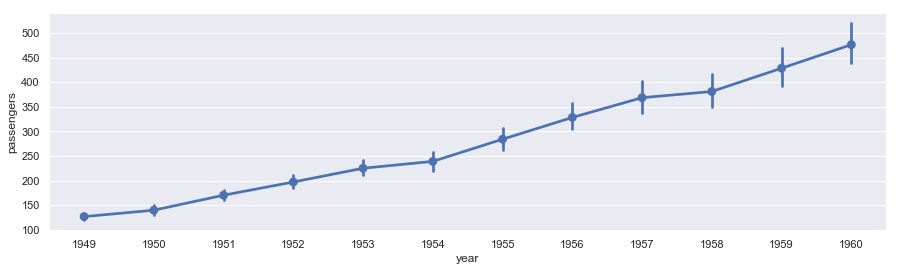

In [147]:
# pointplot

plt.figure(figsize = (15,4))
sns.pointplot(data = df, x = 'year', y = 'passengers')

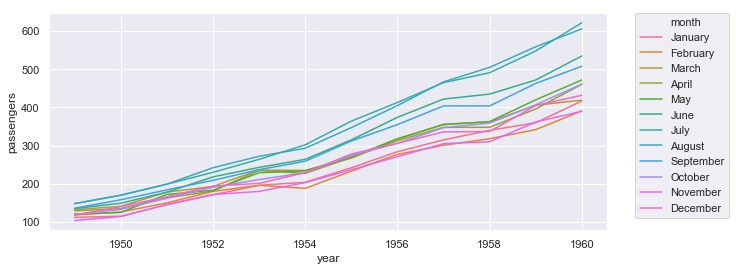

In [154]:
# lineplot 에 hue = 'month' 에 따라 여러 색으로 나눠 그리기

plt.figure(figsize = (10,4))
sns.lineplot(data = df, x = 'year', y = 'passengers', hue = 'month')

# 범례를 밖으로 옮기기
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad  = 0.)

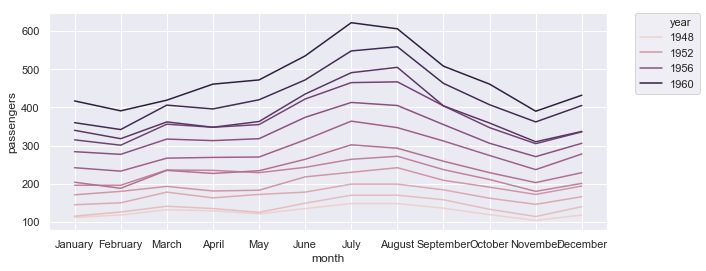

In [158]:
# lineplot 에 hue 를 통해 year 값에 따라 여러색으로 나눠 그리기

plt.figure(figsize = (10,4))
sns.lineplot(data = df, x = 'month', y = 'passengers', hue = 'year')

# 범례를 밖으로 옮기기
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad  = 0.)

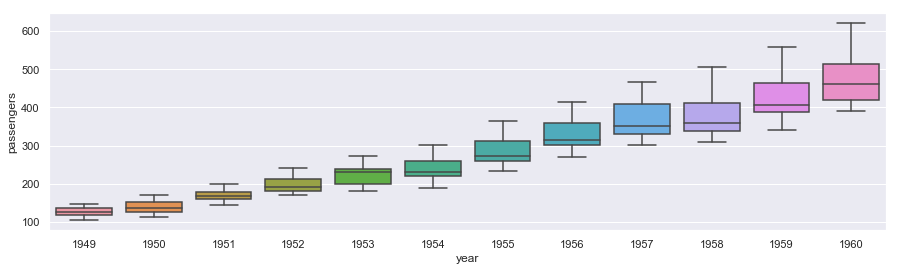

In [160]:
# boxplot
plt.figure(figsize = (15,4))
sns.boxplot(data =df, x = 'year', y = 'passengers')

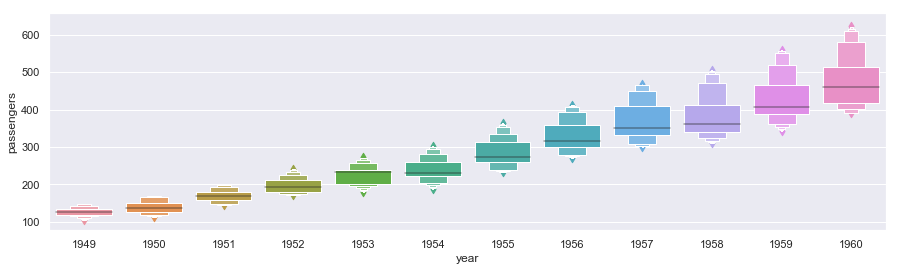

In [161]:
# boxenplot

plt.figure(figsize = (15,4))
sns.boxenplot(data =df, x = 'year', y = 'passengers')

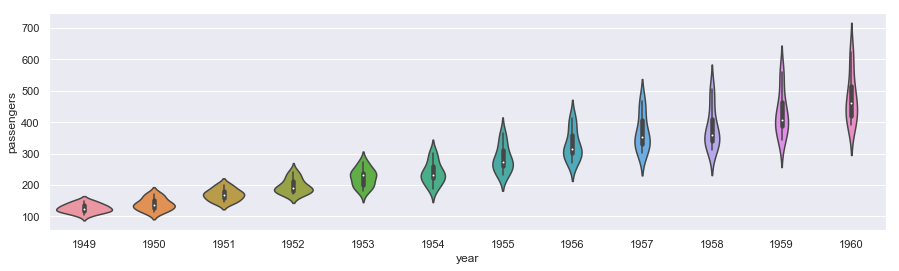

In [162]:
# violinplot

plt.figure(figsize = (15,4))
sns.violinplot(data =df, x = 'year', y = 'passengers')

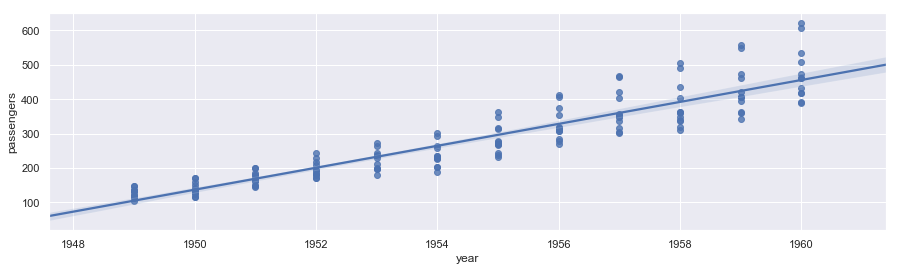

In [166]:
# regplot

plt.figure(figsize = (15,4))
sns.regplot(data =df, x = 'year', y = 'passengers')

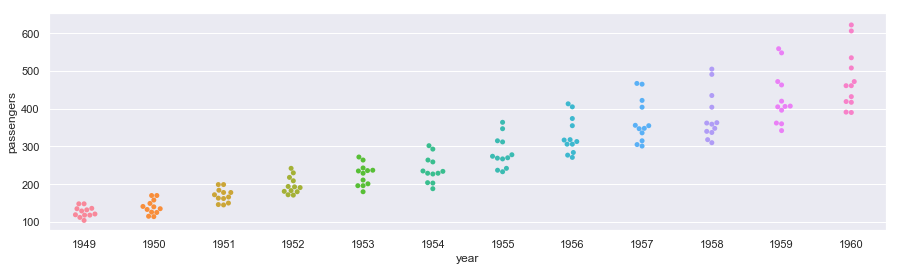

In [163]:
# swarmplot

plt.figure(figsize = (15,4))
sns.swarmplot(data =df, x = 'year', y = 'passengers')

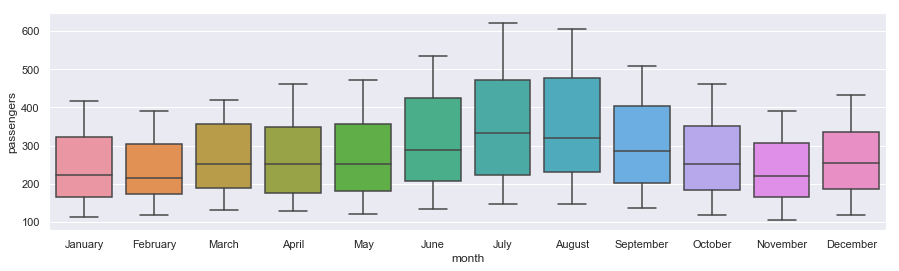

In [164]:
# boxplot  - month

plt.figure(figsize = (15,4))
sns.boxplot(data =df, x = 'month', y = 'passengers')

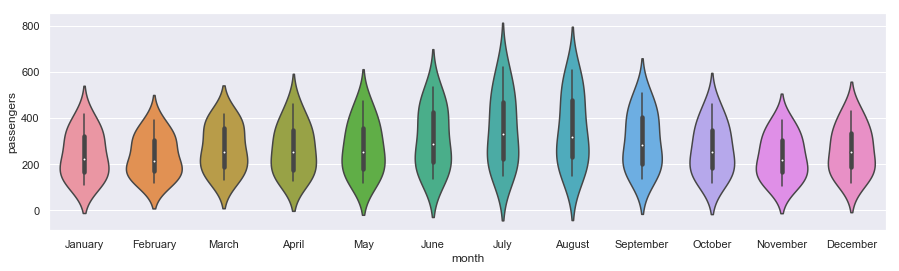

In [165]:
# violin  - month

plt.figure(figsize = (15,4))
sns.violinplot(data =df, x = 'month', y = 'passengers')

### pivot 으로 데이터 형태 바꾸기

pivot_table은 연산을 수행하고, pivot은 연산을 수행하지 않고 형태만 바꿈.

In [171]:
df_h = df.pivot(index = 'month', columns = 'year', values = 'passengers')
df_h

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


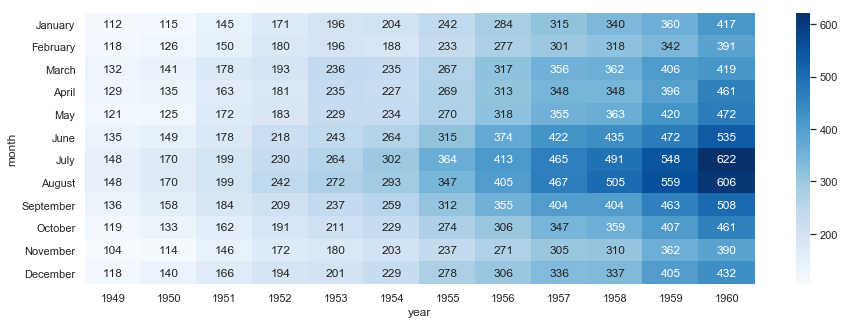

In [175]:
# heatmap
plt.figure(figsize = (15,5)) 
sns.heatmap(df_h, annot=True, fmt = '.0f', cmap = 'Blues')

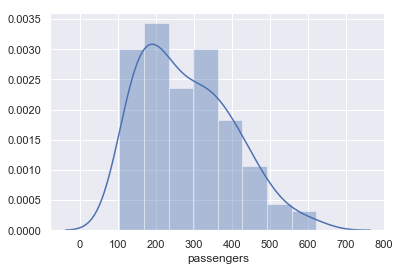

In [177]:
# displot

sns.distplot(df['passengers'])

### 서브플롯 그리기

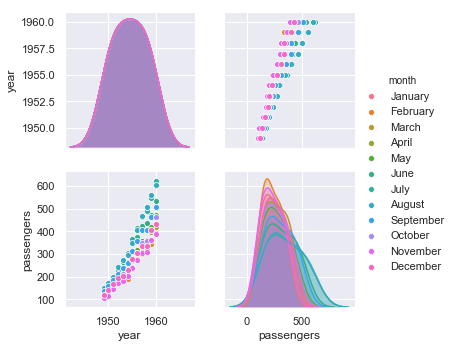

In [179]:
# pairplot

sns.pairplot(data = df, hue = 'month')

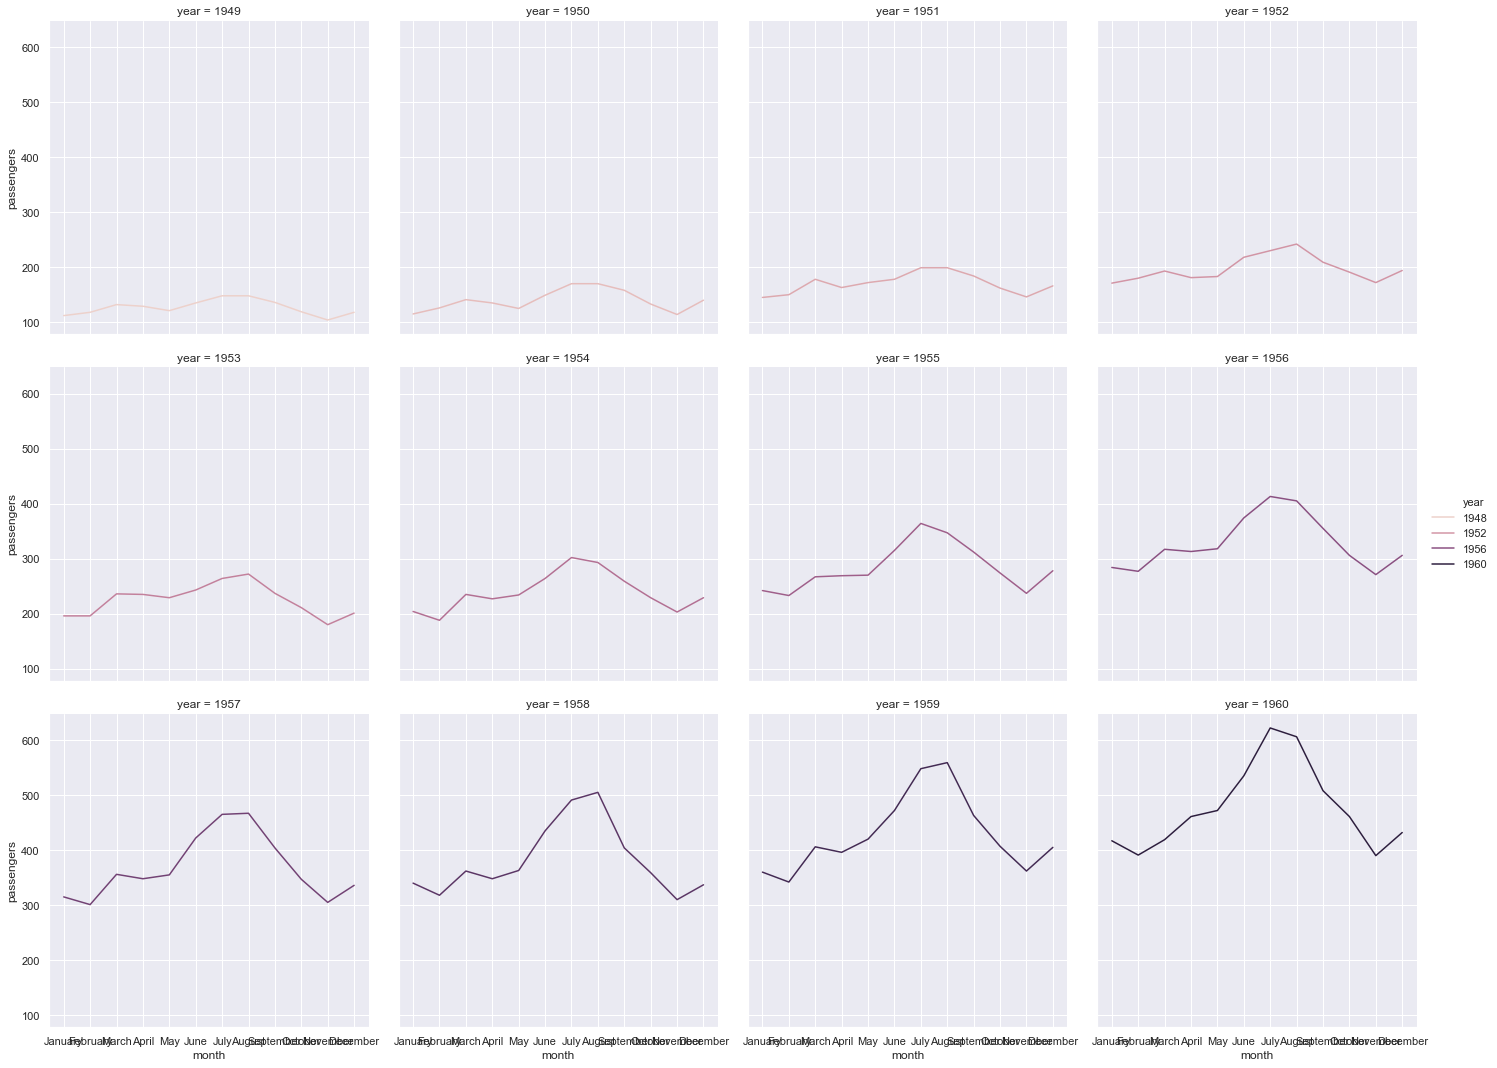

In [182]:
# replot : col 옵션이 있음

sns.relplot(data = df, x = 'month', y = 'passengers', kind = 'line',
            hue = 'year', col = 'year', col_wrap = 4)

### datetime 형태로 변환해서 보기

In [191]:
# 날짜 변환을 하기 전에 동작을 확인하고 변환 함수를 만듭니다.

from datetime import datetime

year = 2000
month = 'March'

s = f"{year} {month} 1"
d = datetime.strptime(s, "%Y %B %d")
d.strftime("%Y -%m-%d")

'2000 -03-01'

In [193]:
# 함수 생성

def find_datetime(row):
    year = row["year"]
    month = row['month']
    
    s = f"{year} {month} 1"
    d = datetime.strptime(s, "%Y %B %d")
    
    return d.strftime("%Y -%m-%d")

In [194]:
# apply를 통해 함수 적용

df['date'] = df.apply(find_datetime, axis =1)
df['date'] = pd.to_datetime(df['date'])
df['date'].head(1)

0   1949-01-01
Name: date, dtype: datetime64[ns]

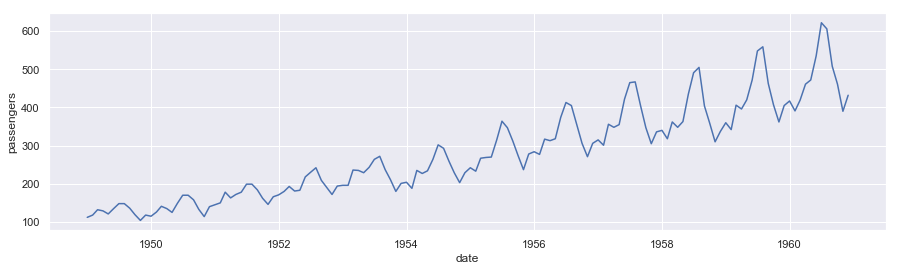

In [198]:
plt.figure(figsize = (15,4))
sns.lineplot(data = df, x = 'date', y = 'passengers')

## Time Series data Decomposition 시계열 데이터 분해

* Trend
* Sasonal
* Residual(random, remainder)

In [203]:
df_date = df[['date', 'passengers']].set_index('date')
df_date.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 시계열 분해

#### Additive Model 가법 모형

y1 = Level + Trend + Seasonality + Noise

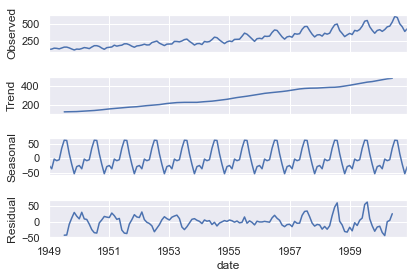

In [210]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_date, model = 'additive')
d = decomp.plot()

#### Multiplicative Model 승법 모형

y1 = Level x Trend x Seasonality x Noise

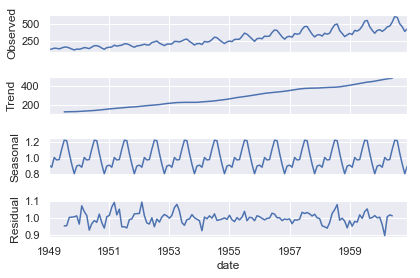

In [212]:
decomp = seasonal_decompose(df_date, model = 'multiplicative')
d = decomp.plot()

residual이 1 값에 수렴하는 것이 보임